In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('data\jobs_housing_clean.csv', thousands=',')
df = df.drop(columns=['Unnamed: 0','lat','lon','Geographic Area Name'])
df['housing_job_dif'] =  df['dec_2023_employment'] - df['housing_units']
df.dtypes

County                                                                                                                                                                         object
Quarterly Establishments                                                                                                                                                        int64
October Employment                                                                                                                                                              int64
November Employment                                                                                                                                                             int64
dec_2023_employment                                                                                                                                                             int64
                                                                                          

In [6]:
#correlations 
slope, intercept, r_value, p_value, std_err = stats.linregress(df['unit_per_job'],df['Average Weekly Wage'])

r_squared = round(r_value**2,2)
print('jobs vs. wages')
print('r-squared: ',r_squared)
print('slope: ',round(slope,2))
print('intercept: ',round(intercept))
print('p-value: ',round(p_value))

jobs vs. wages
r-squared:  0.32
slope:  -110.77
intercept:  1198
p-value:  0


Text(1.59, 625, 'Correlation = 0.32')

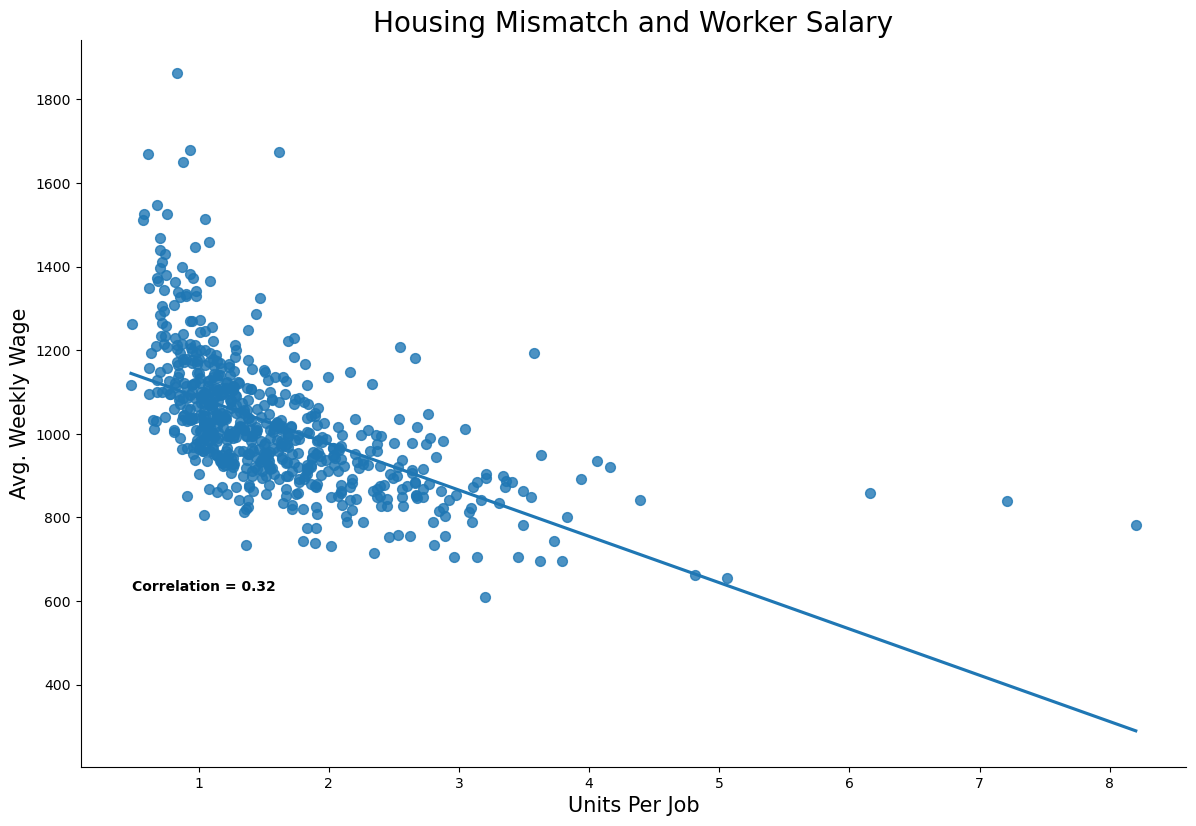

In [8]:
#scatter
#fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
ax = sns.lmplot(x='unit_per_job', 
                y='Average Weekly Wage',
                data=df,
                fit_reg=True,
                markers="o", 
                scatter_kws={'s':50},
                height=8,
                aspect=1.5,
                legend=False,
                ci=0
                )

plt.title('Housing Mismatch and Worker Salary',size=20)
plt.xlabel('Units Per Job',size=15)
plt.ylabel('Avg. Weekly Wage',size=15)
#plt.xlim(1000, 82000)
#plt.legend(loc='upper right')
#plt.ylim(0, None)
plt.text(1.59, 625, "Correlation = 0.32", horizontalalignment='right', size='medium', color='black', weight='semibold')
#plt.text(80000, 7500, "Non-Charter Correlation = .18", horizontalalignment='right', size='large', color='black', weight='semibold')



In [9]:
#scatter
#fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
ax = sns.lmplot(y='dec_2023_employment', 
                x='housing_units',
                data=df,
                fit_reg=True,
                markers="o", 
                scatter_kws={'s':50},
                height=8,
                aspect=1.5,
                legend=False,
                ci=0
                )

plt.title('Housing Mismatch and Worker Salary',size=20)
plt.ylabel('# Occupied Housing Units',size=15)
plt.xlabel('# Jobs',size=15)
plt.xlim(0, None)
#plt.legend(loc='upper right')
plt.ylim(0, None)
#plt.text(1.59, 625, "Correlation = 0.44", horizontalalignment='right', size='medium', color='black', weight='semibold')
#plt.text(80000, 7500, "Non-Charter Correlation = .18", horizontalalignment='right', size='large', color='black', weight='semibold')



(0.0, 2798493.8538603266)

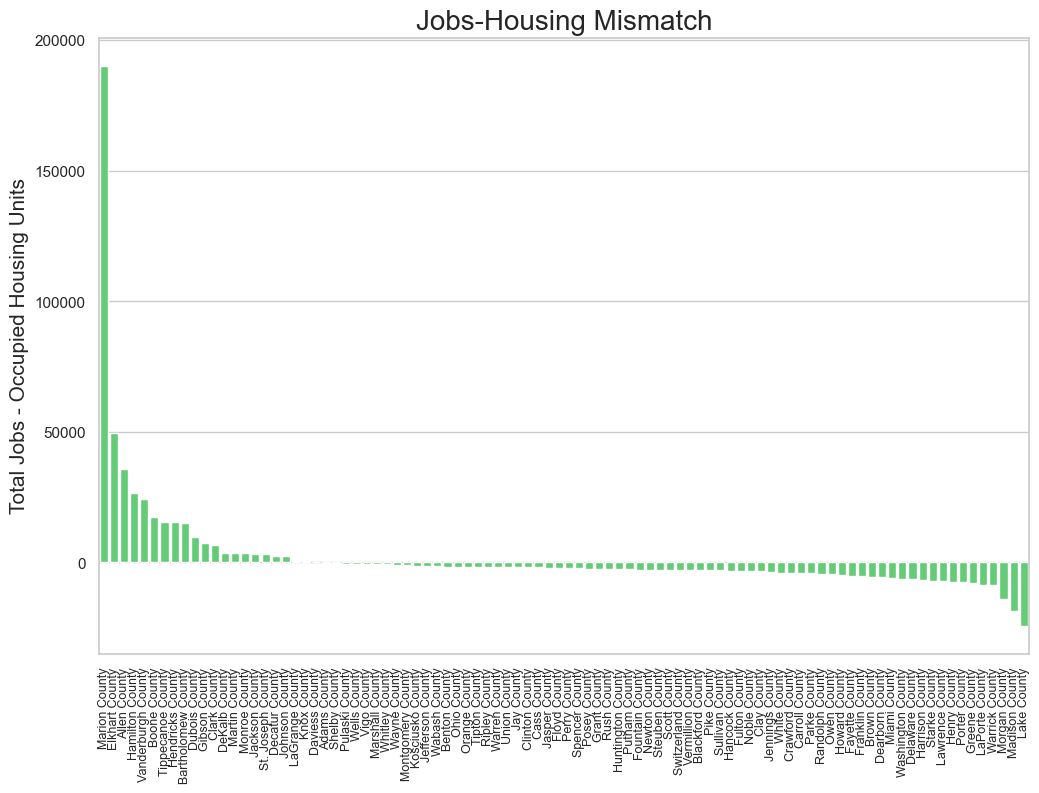

In [14]:
#bar chart - biggest to smallest gap https://sf.curbed.com/2016/10/12/12945854/bay-area-cities-jobs-housing-san-jose-palo-alto-sf
#C-bus has as big of a housing gap as San Jose, CA
dff = df.loc[ df['State'].isin(['Indiana']), : ]
dff = dff.sort_values(['housing_job_dif', 'County'], ascending=[0, 1])
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax = sns.barplot(x="County", 
                 y="housing_job_dif", 
                 data=dff,
                 color='#53DD6C'
                 )

plt.title('Jobs-Housing Mismatch',size=20)
plt.xlabel('',size=15)
plt.ylabel('Total Jobs - Occupied Housing Units',size=15)
plt.xticks(rotation=90, size=9)
plt.show()

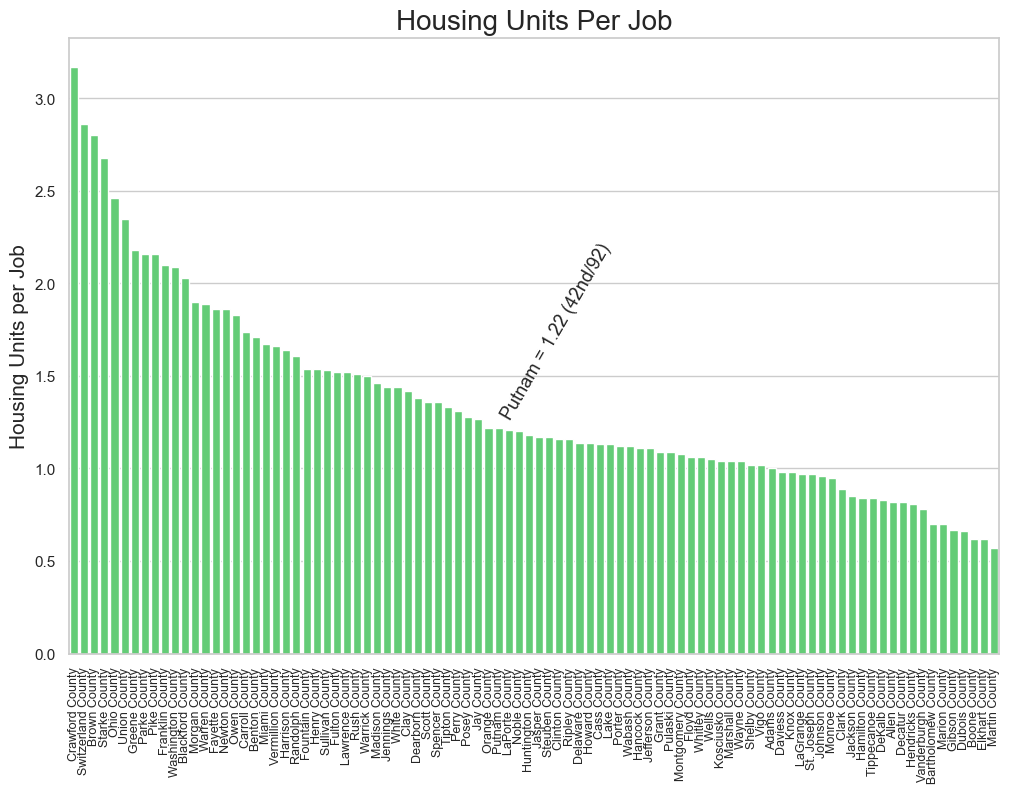

In [27]:
#bar chart - biggest to smallest gap https://sf.curbed.com/2016/10/12/12945854/bay-area-cities-jobs-housing-san-jose-palo-alto-sf
#C-bus has as big of a housing gap as San Jose, CA

dff = dff.sort_values(['unit_per_job', 'County'], ascending=[0, 1])
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax = sns.barplot(x="County", 
                 y="unit_per_job", 
                 data=dff,
                 color='#53DD6C'
                 )

plt.title('Housing Units Per Job',size=20)
plt.xlabel('',size=15)
plt.ylabel('Housing Units per Job',size=15)
plt.text(42,1.27,'Putnam = 1.22 (42nd/92)',size=13, rotation=60)
#plt.text(86,.75,'Franklin = .73 (86th/88)',size=13, rotation=60)
#plt.text(85,.83,'Hamilton = .74 (85th/88)',size=13, rotation=60)
plt.xticks(rotation=90, size=9)
plt.show()

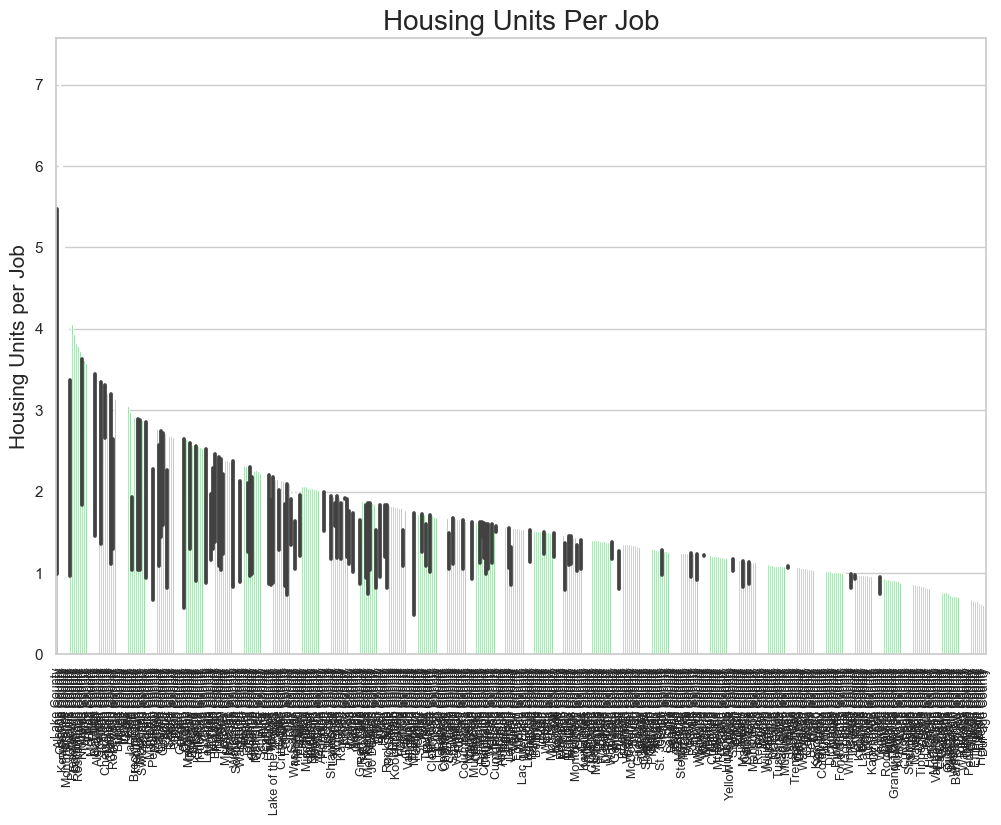

In [31]:
#bar chart - biggest to smallest gap https://sf.curbed.com/2016/10/12/12945854/bay-area-cities-jobs-housing-san-jose-palo-alto-sf
#C-bus has as big of a housing gap as San Jose, CA

df = df.sort_values(['unit_per_job', 'County'], ascending=[0, 1])
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax = sns.barplot(x="County", 
                 y="unit_per_job", 
                 data=df,
                 color='#53DD6C'
                 )

plt.title('Housing Units Per Job',size=20)
plt.xlabel('',size=15)
plt.ylabel('Housing Units per Job',size=15)
#plt.text(42,1.27,'Putnam = 1.22 (42nd/92)',size=13, rotation=60)
#plt.text(86,.75,'Franklin = .73 (86th/88)',size=13, rotation=60)
#plt.text(85,.83,'Hamilton = .74 (85th/88)',size=13, rotation=60)
plt.xticks(rotation=90, size=9)
plt.show()

In [29]:
df['percentile_region'] =  df['unit_per_job'].rank(pct=True)
df['rank_region'] =  df['unit_per_job'].rank()
df
df.loc[ df['County'].isin(['Putnam County']), : ]

,County,Quarterly Establishments,October Employment,November Employment,dec_2023_employment,Quarterly Wages,Average Weekly Wage,December Employment Location Quotient,Total Quarterly Wages Location Quotient,Geography,...,Percent Margin of Error!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!30.0 to 34.9 percent,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more,Percent Margin of Error!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed,Percent Margin of Error!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed,unit_per_job,State,housing_job_dif,percentile_region,rank_region
77,Putnam County,169,1947,1883,1901,41593460,1675,1,1,0500000US17155,...,2.5,34.5,8.5,(X),(X),1.62,Illinois,-1170,0.637422,410.5
168,Putnam County,757,12603,12704,12326,157551469,966,1,1,0500000US18133,...,4.5,30.4,7.3,(X),(X),1.22,Indiana,-2668,0.402950,259.5
552,Putnam County,853,12408,12399,12389,160047406,993,1,1,0500000US39137,...,5.4,27.4,7.0,(X),(X),1.12,Ohio,-1457,0.315217,203.0


In [28]:
dff['percentile_state'] =  dff['unit_per_job'].rank(pct=True)
dff['rank_state'] =  dff['unit_per_job'].rank()
dff
dff.loc[ df['County'].isin(['Montgomery County']), : ]

,County,Quarterly Establishments,October Employment,November Employment,dec_2023_employment,Quarterly Wages,Average Weekly Wage,December Employment Location Quotient,Total Quarterly Wages Location Quotient,Geography,...,Percent Margin of Error!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!30.0 to 34.9 percent,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more,Percent Margin of Error!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed,Percent Margin of Error!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed,unit_per_job,State,housing_job_dif,percentile_state,rank_state
155,Montgomery County,903,15465,15442,15351,217862498,1087,1,1,0500000US18107,...,3.4,34.2,5.3,(X),(X),1.08,Indiana,-1153,0.347826,32.0
